In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the cleaned CSVs
orders = pd.read_csv("../data_processed/orders_delivered.csv")
order_items = pd.read_csv("../data_processed/order_items_clean.csv")
products = pd.read_csv("../data_processed/products_clean.csv")

## Inspecting the datasets

In [3]:
orders.head()

,order_id,customer_id,order_purchase_timestamp,year,month,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017,10,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018,7,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018,8,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017,11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018,2,2018-02


In [4]:
order_items.head()

,order_id,product_id,price,freight_value,sales
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,199.90


In [5]:
products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [6]:
orders.shape

(96478, 6)

In [7]:
order_items.shape

(112650, 5)

In [8]:
products.shape

(32951, 2)

## Merging orders with order_items

In [9]:

orders_items_marged = orders.merge(order_items, on="order_id", how="inner")

In [10]:
orders_items_marged.head()

,order_id,customer_id,order_purchase_timestamp,year,month,year_month,product_id,price,freight_value,sales
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017,10,2017-10,87285b34884572647811a353c7ac498a,29.99,8.72,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018,7,2018-07,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018,8,2018-08,aa4383b373c6aca5d8797843e5594415,159.90,19.22,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017,11,2017-11,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018,2,2018-02,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,19.90


In [11]:
orders_items_marged.shape

(110197, 10)

## Merging the products data with orders_items data (data from orders and orders_items)

In [12]:
full_data = orders_items_marged.merge(products, on="product_id", how="left")

In [13]:
full_data.head()

,order_id,customer_id,order_purchase_timestamp,year,month,year_month,product_id,price,freight_value,sales,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017,10,2017-10,87285b34884572647811a353c7ac498a,29.99,8.72,29.99,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018,7,2018-07,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,118.70,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018,8,2018-08,aa4383b373c6aca5d8797843e5594415,159.90,19.22,159.90,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017,11,2017-11,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,45.00,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018,2,2018-02,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,19.90,papelaria


In [14]:
full_data["product_category_name"].unique

<bound method Series.unique of 0          utilidades_domesticas
1                     perfumaria
2                     automotivo
3                       pet_shop
4                      papelaria
                   ...          
110192                     bebes
110193        eletrodomesticos_2
110194    informatica_acessorios
110195    informatica_acessorios
110196              beleza_saude
Name: product_category_name, Length: 110197, dtype: object>

In [15]:
full_data.shape

(110197, 11)

In [16]:
full_data.isna().sum()

order_id                    0
customer_id                 0
order_purchase_timestamp    0
year                        0
month                       0
year_month                  0
product_id                  0
price                       0
freight_value               0
sales                       0
product_category_name       0
dtype: int64

In [17]:
full_data.dtypes

order_id                     object
customer_id                  object
order_purchase_timestamp     object
year                          int64
month                         int64
year_month                   object
product_id                   object
price                       float64
freight_value               float64
sales                       float64
product_category_name        object
dtype: object

In [18]:
#Converting year_month to a Period Type
full_data['year_month'] = full_data['year_month'].astype(str)
full_data['year_month'] = pd.PeriodIndex(full_data['year_month'], freq='M')

In [19]:
full_data.head()

,order_id,customer_id,order_purchase_timestamp,year,month,year_month,product_id,price,freight_value,sales,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017,10,2017-10,87285b34884572647811a353c7ac498a,29.99,8.72,29.99,utilidades_domesticas
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018,7,2018-07,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,118.70,perfumaria
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018,8,2018-08,aa4383b373c6aca5d8797843e5594415,159.90,19.22,159.90,automotivo
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017,11,2017-11,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,45.00,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018,2,2018-02,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,19.90,papelaria


## Aggregating Monthly Total Sales

In [20]:
monthly_sales = full_data.groupby("year_month")["sales"].sum().reset_index()

In [21]:
monthly_sales

,year_month,sales
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40
5,2017-03,359198.85
6,2017-04,340669.68
7,2017-05,489338.25
8,2017-06,421923.37
9,2017-07,481604.52


In [22]:
monthly_sales = monthly_sales.sort_values("year_month")

In [23]:
monthly_sales.head()

,year_month,sales
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40


In [24]:
monthly_sales.tail()

,year_month,sales
18,2018-04,973534.09
19,2018-05,977544.69
20,2018-06,856077.86
21,2018-07,867953.46
22,2018-08,838576.64


In [25]:
monthly_sales.shape

(23, 2)

## Grouping by year_month and counting unique order_id

In [26]:
monthly_order_counts = full_data.groupby("year_month")["order_id"].nunique().reset_index()

In [27]:
monthly_order_counts.head()

,year_month,order_id
0,2016-09,1
1,2016-10,265
2,2016-12,1
3,2017-01,750
4,2017-02,1653


In [28]:
# Renaming the order_id column for clarity
monthly_order_counts = monthly_order_counts.rename(columns={"order_id": "order_count"})
monthly_order_counts.head()

,year_month,order_count
0,2016-09,1
1,2016-10,265
2,2016-12,1
3,2017-01,750
4,2017-02,1653


In [29]:
#Sorting the result
monthly_order_counts = monthly_order_counts.sort_values("year_month")
monthly_order_counts.head(10)

,year_month,order_count
0,2016-09,1
1,2016-10,265
2,2016-12,1
3,2017-01,750
4,2017-02,1653
5,2017-03,2546
6,2017-04,2303
7,2017-05,3546
8,2017-06,3135
9,2017-07,3872


In [30]:
monthly_order_counts.tail()

,year_month,order_count
18,2018-04,6798
19,2018-05,6749
20,2018-06,6099
21,2018-07,6159
22,2018-08,6351


In [31]:
monthly_order_counts.shape

(23, 2)

## Merging Monthly Sales + Monthly Order Counts

In [32]:
monthly_sales.head()

,year_month,sales
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40


In [33]:
monthly_data = monthly_sales.merge(monthly_order_counts, on="year_month", how="inner")

In [34]:
monthly_data.head(10)

,year_month,sales,order_count
0,2016-09,134.97,1
1,2016-10,40325.11,265
2,2016-12,10.90,1
3,2017-01,111798.36,750
4,2017-02,234223.40,1653
5,2017-03,359198.85,2546
6,2017-04,340669.68,2303
7,2017-05,489338.25,3546
8,2017-06,421923.37,3135
9,2017-07,481604.52,3872


In [35]:
#sorting the monthly_data
monthly_data = monthly_data.sort_values("year_month")
monthly_data.head()

,year_month,sales,order_count
0,2016-09,134.97,1
1,2016-10,40325.11,265
2,2016-12,10.90,1
3,2017-01,111798.36,750
4,2017-02,234223.40,1653


In [36]:
monthly_data.tail(10)

,year_month,sales,order_count
13,2017-11,987765.37,7289
14,2017-12,726033.19,5513
15,2018-01,924645.00,7069
16,2018-02,826437.13,6555
17,2018-03,953356.25,7003
18,2018-04,973534.09,6798
19,2018-05,977544.69,6749
20,2018-06,856077.86,6099
21,2018-07,867953.46,6159
22,2018-08,838576.64,6351


In [37]:
monthly_data.shape

(23, 3)

## Finding the highest and lowest order count by month

In [38]:
highest_order_count_month = monthly_data.loc[monthly_data["order_count"].idxmax()]
highest_order_count_month

year_month       2017-11
sales          987765.37
order_count         7289
Name: 13, dtype: object

In [39]:
lowest_order_count_month = monthly_data.loc[monthly_data["order_count"].idxmin()]
lowest_order_count_month

year_month     2016-09
sales           134.97
order_count          1
Name: 0, dtype: object

In [40]:
#Saving the monthly data in csv file
monthly_data.to_csv("../data_processed/monthly_sales_orders.csv", index=False)

## Visualizing monthly sales trend using matplotlib

In [41]:
x = monthly_data["year_month"].astype(str)
y = monthly_data["sales"]

In [42]:
x.head()

0    2016-09
1    2016-10
2    2016-12
3    2017-01
4    2017-02
Name: year_month, dtype: object

In [43]:
y.head()

0       134.97
1     40325.11
2        10.90
3    111798.36
4    234223.40
Name: sales, dtype: float64

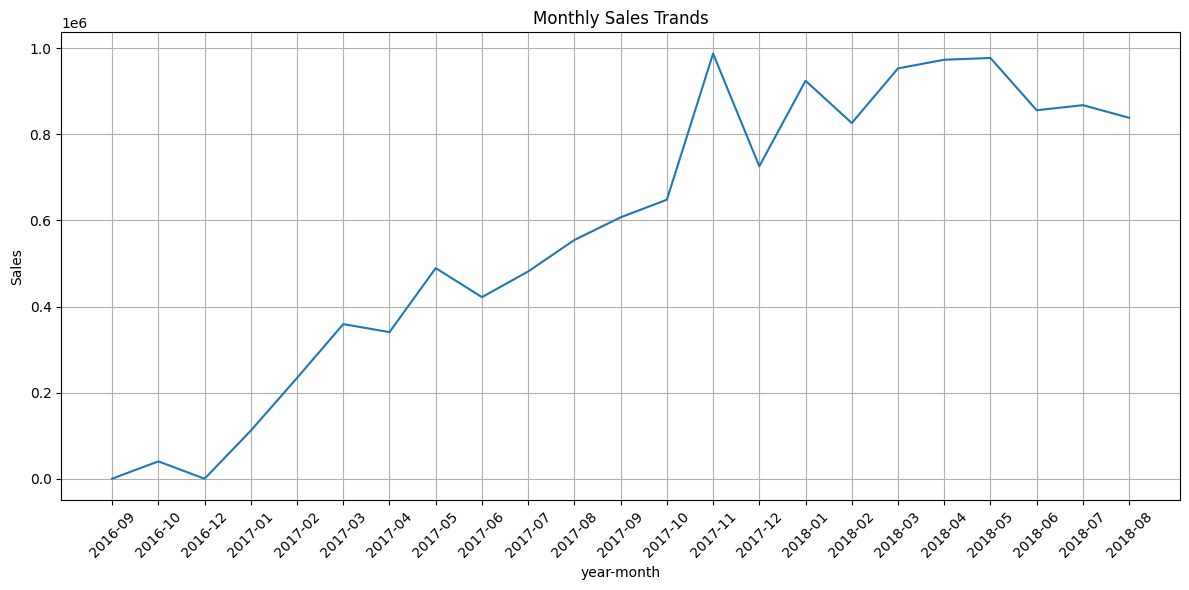

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.title("Monthly Sales Trands")
plt.xlabel("year-month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/monthly_sales_trend.png", dpi=300)
plt.show();


## Visualize Monthly Order Trend

In [45]:
x = monthly_data["year_month"].astype(str)
y_orders = monthly_data["order_count"]



In [46]:
x.head()

0    2016-09
1    2016-10
2    2016-12
3    2017-01
4    2017-02
Name: year_month, dtype: object

In [47]:
y.head()

0       134.97
1     40325.11
2        10.90
3    111798.36
4    234223.40
Name: sales, dtype: float64

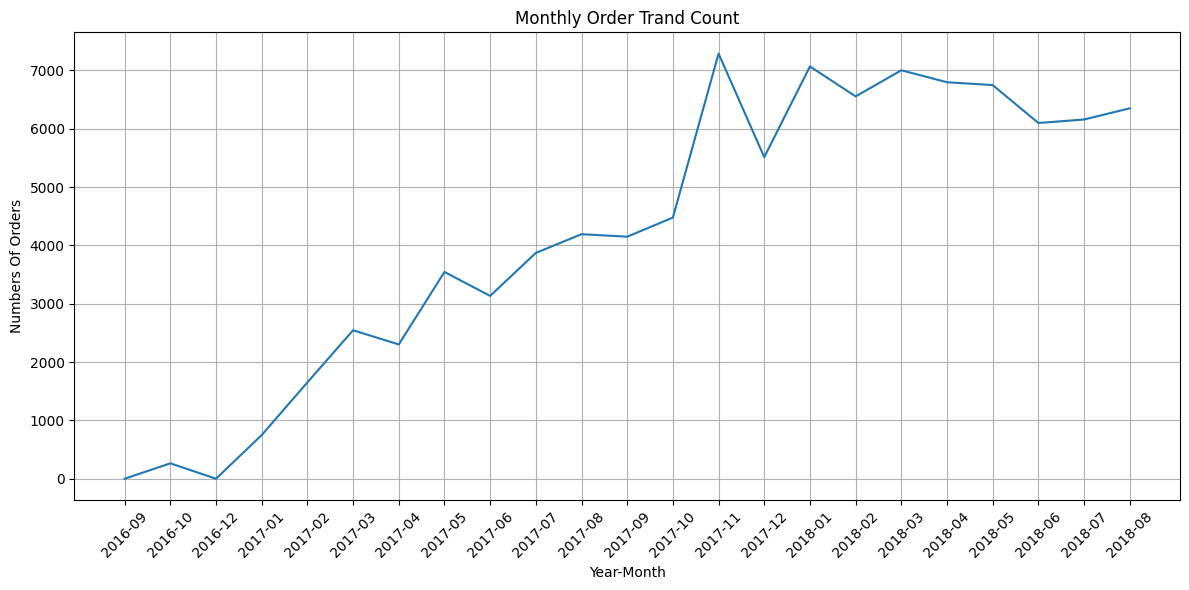

In [48]:
plt.figure(figsize=(12,6))
plt.plot(x, y_orders)
plt.title("Monthly Order Trand Count")
plt.xlabel("Year-Month")
plt.ylabel("Numbers Of Orders")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/monthly_order_count_trend.png", dpi=300)
plt.show()

## Combined Monthly Sales + Order Count Trend

In [49]:
x = monthly_data["year_month"].astype("str")
y_sales = monthly_data["sales"]
y_orders = monthly_data["order_count"]
y_orders.head()

0       1
1     265
2       1
3     750
4    1653
Name: order_count, dtype: int64

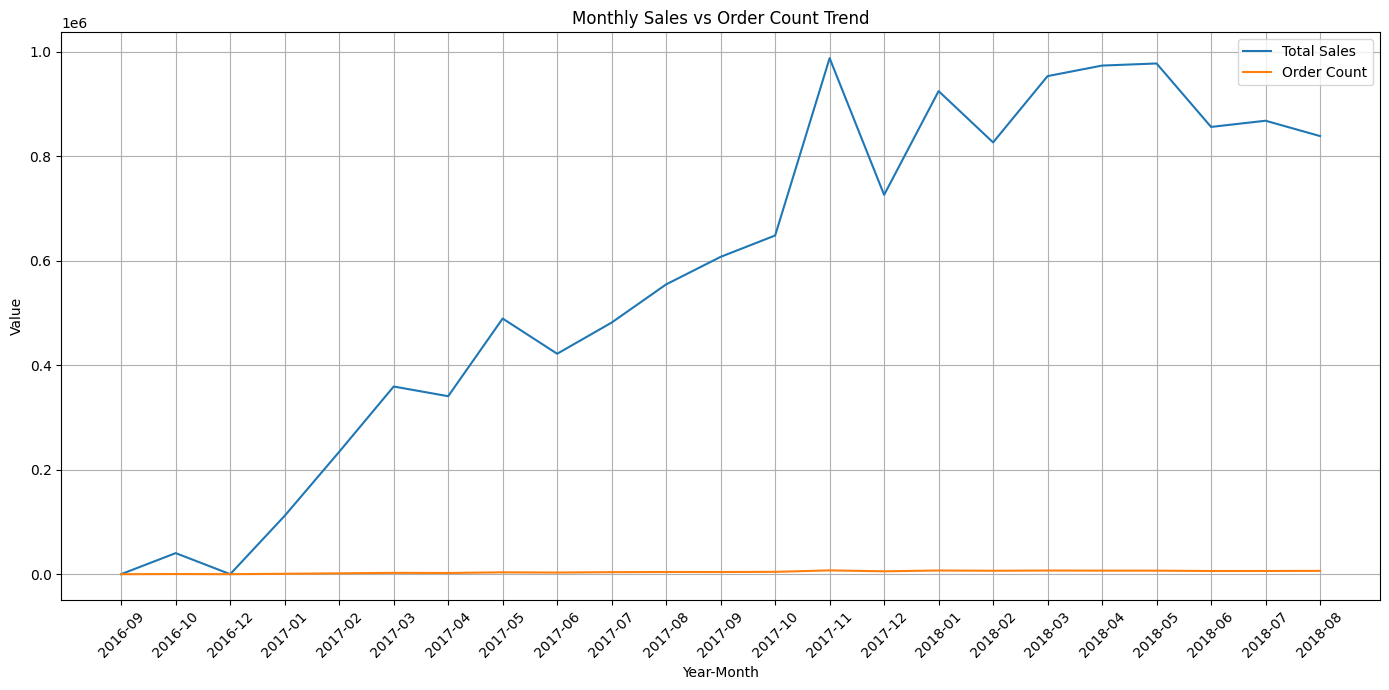

In [50]:
plt.figure(figsize=(14,7))

plt.plot(x, y_sales, label="Total Sales")
plt.plot(x, y_orders, label="Order Count")

plt.title("Monthly Sales vs Order Count Trend")
plt.xlabel("Year-Month")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [51]:
monthly_data[['sales', 'order_count']].describe()


,sales,order_count
count,23.000000,23.000000
mean,574847.743913,4194.695652
std,337263.532856,2481.181398
min,10.900000,1.000000
25%,349934.265000,2424.500000
50%,607399.670000,4193.000000
75%,862015.660000,6453.000000
max,987765.370000,7289.000000


/var/folders/pl/4zx51yk51m92jkt4my3xbsdw0000gn/T/ipykernel_6992/3643645839.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x, rotation=45)


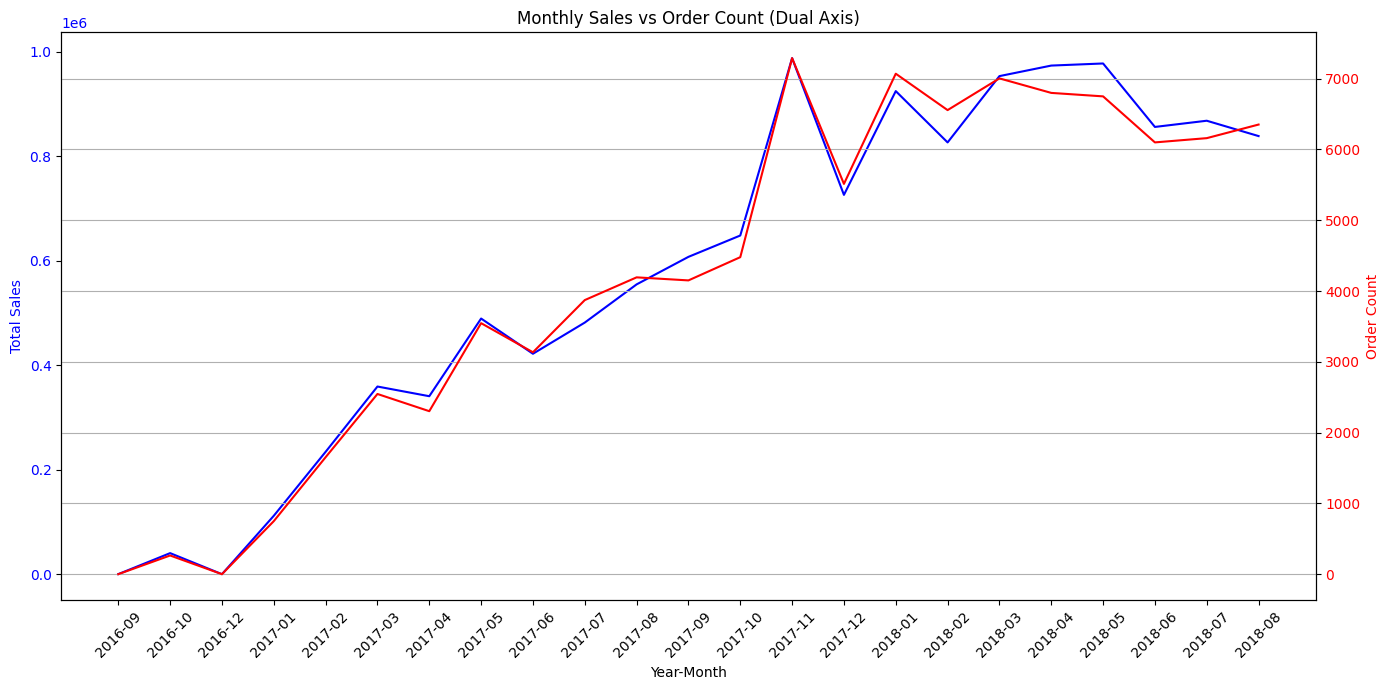

In [52]:
fig, ax1 = plt.subplots(figsize=(14,7))

# Plot Sales on left Y-axis
ax1.plot(x, y_sales, color='blue', label='Total Sales')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(x, rotation=45)

# Create right Y-axis
ax2 = ax1.twinx()
ax2.plot(x, y_orders, color='red', label='Order Count')
ax2.set_ylabel('Order Count', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Monthly Sales vs Order Count (Dual Axis)')
plt.grid(True)
plt.tight_layout()

plt.savefig("../figures/monthly_sales_plus_order_count.png", dpi=300)

plt.show()



## Identifing Top Product Categories

In [53]:
# Grouping by product category and sum the sales
category_sales = full_data.groupby("product_category_name")["sales"].sum().reset_index()
category_sales.head()

,product_category_name,sales
0,agro_industria_e_comercio,70566.10
1,alimentos,28731.15
2,alimentos_bebidas,14942.88
3,artes,23657.30
4,artes_e_artesanato,1814.01


In [54]:
#Sort by sales (descending)
category_sales = category_sales.sort_values("sales", ascending=False)

In [55]:
top_category = category_sales.nlargest(1, "sales")
top_category

,product_category_name,sales
11,beleza_saude,1233131.72


In [56]:
category_sales.head(10)

,product_category_name,sales
11,beleza_saude,1233131.72
66,relogios_presentes,1166176.98
13,cama_mesa_banho,1023434.76
32,esporte_lazer,954852.55
44,informatica_acessorios,888724.61
54,moveis_decoracao,711927.69
73,utilidades_domesticas,615628.69
26,cool_stuff,610204.10
8,automotivo,578966.65
12,brinquedos,471286.48


In [57]:
category_sales.tail()

,product_category_name,sales
41,flores,1110.04
15,casa_conforto_2,760.27
17,cds_dvds_musicais,730.00
37,fashion_roupa_infanto_juvenil,519.95
67,seguros_e_servicos,283.29


In [58]:
nov_2017_sales = full_data[
    (full_data["year"] == 2017) & (full_data["month"] == 11)
]["sales"].sum()
nov_2017_sales

np.float64(987765.37)

## Analyzing Monthly Trends for Top Product Categories

In [59]:
# Selecting the top 5 categories
top_5_categories = category_sales.head(5)["product_category_name"].tolist()
top_5_categories

['beleza_saude',
 'relogios_presentes',
 'cama_mesa_banho',
 'esporte_lazer',
 'informatica_acessorios']

In [60]:
#Filtering full_data to only include those categories
top_data = full_data[full_data["product_category_name"].isin(top_5_categories)]
top_data.head()

,order_id,customer_id,order_purchase_timestamp,year,month,year_month,product_id,price,freight_value,sales,product_category_name
11,34513ce0c4fab462a55830c0989c7edb,7711cf624183d843aafe81855097bc37,2017-07-13 19:58:11,2017,7,2017-07,f7e0fa615b386bc9a8b9eb52bc1fff76,98.00,16.13,98.00,informatica_acessorios
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,2018-07-25 17:44:10,2018,7,2018-07,10adb53d8faa890ca7c2f0cbcb68d777,19.90,12.80,19.90,cama_mesa_banho
18,85ce859fd6dc634de8d2f1e290444043,059f7fc5719c7da6cbafe370971a8d70,2017-11-21 00:03:41,2017,11,2017-11,cce679660c66e6fbd5c8091dfd29e9cd,17.90,11.85,17.90,cama_mesa_banho
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,2017-09-18 14:31:30,2017,9,2017-09,5ac9d9e379c606e36a8094a6046f75dc,109.90,8.96,109.90,beleza_saude
21,f848643eec1d69395095eb3840d2051e,4fa1cd166fa598be6de80fa84eaade43,2018-03-15 08:52:40,2018,3,2018-03,2b4609f8948be18874494203496bc318,79.99,8.91,79.99,beleza_saude


In [61]:
category_monthly = top_data.groupby(["year_month", "product_category_name"])["sales"].sum().reset_index()
category_monthly.head()

,year_month,product_category_name,sales
0,2016-09,beleza_saude,134.97
1,2016-10,beleza_saude,3439.25
2,2016-10,cama_mesa_banho,478.99
3,2016-10,esporte_lazer,2012.15
4,2016-10,informatica_acessorios,669.02


In [62]:
category_monthly['year_month_str'] = category_monthly['year_month'].astype(str)

## Creating Multi-line Chart


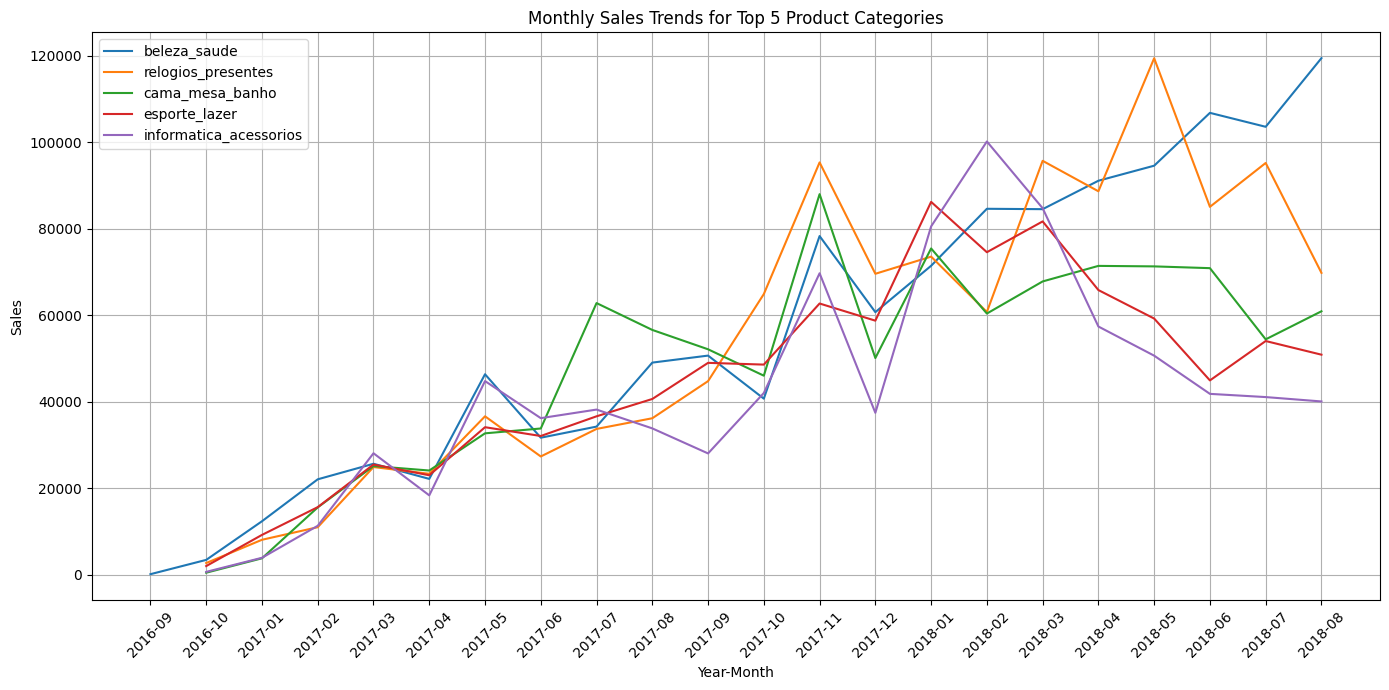

In [63]:
plt.figure(figsize=(14,7))

for category in top_5_categories:
    data_temp = category_monthly[category_monthly['product_category_name'] == category]
    plt.plot(data_temp['year_month_str'], data_temp['sales'], label=category)

plt.title("Monthly Sales Trends for Top 5 Product Categories")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("../figures/monthly_sales_trends_for_5_categories.png", dpi=300)

plt.show()

## Identify highest-selling months for each top category

In [64]:
highest_sales_month = category_monthly.loc[category_monthly.groupby('product_category_name')['sales'].idxmax()]
highest_sales_month


,year_month,product_category_name,sales,year_month_str
101,2018-08,beleza_saude,119391.01,2018-08
57,2017-11,cama_mesa_banho,87957.63,2017-11
68,2018-01,esporte_lazer,86172.83,2018-01
74,2018-02,informatica_acessorios,100131.99,2018-02
90,2018-05,relogios_presentes,119364.98,2018-05


## Finding the lowest sales month for each category

In [65]:
lowest_sales_month = category_monthly.loc[category_monthly.groupby("product_category_name")["sales"].idxmin()]
lowest_sales_month

,year_month,product_category_name,sales,year_month_str
0,2016-09,beleza_saude,134.97,2016-09
2,2016-10,cama_mesa_banho,478.99,2016-10
3,2016-10,esporte_lazer,2012.15,2016-10
4,2016-10,informatica_acessorios,669.02,2016-10
5,2016-10,relogios_presentes,2711.07,2016-10


In [66]:
monthly_data.to_csv("../data_processed/tableau_monthly_sales_orders.csv", index=False)

In [67]:
category_monthly.to_csv("../data_processed/tableau_category_monthly_sales.csv", index=False)